In [54]:
# Backtesting on INTC (INTEL Corporation)

In [55]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
#plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (20,10)
#plt.rcParams['axes.facecolor'] = 'grey'
#myplot + theme(panel.background = element_rect(fill='green', colour='red'))


In [56]:
import yfinance as yf

In [57]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [58]:
ticker = 'INTC'                  # Stock Name
print(ticker) 
a1 = yf.Ticker(ticker)
df1 = a1.history(period="2500d" , interval = '1d')        

INTC


In [59]:
df2 = df1.loc["2015-05-02" : "2015-06-02"]        # The duration where we are backtesting this stratregy

In [60]:
df = df2.drop(labels = ['High', 'Low', 'Dividends','Stock Splits'], axis = 1)  # Removing unneccesary columns from the dataframe

In [61]:
df      # Final dataframe

,Open,Close,Volume
Date,,,
2015-05-04,28.266583,28.402521,21397300
2015-05-05,28.239923,27.931850,29779200
2015-05-06,27.812044,27.572433,31985400
2015-05-07,27.615224,27.589552,21475300
2015-05-08,27.820600,28.068769,26926500
2015-05-11,27.966078,27.974634,18358600
2015-05-12,27.760701,27.598108,24530200
2015-05-13,27.615222,27.931850,20470800
2015-05-14,28.120113,28.214247,21098900


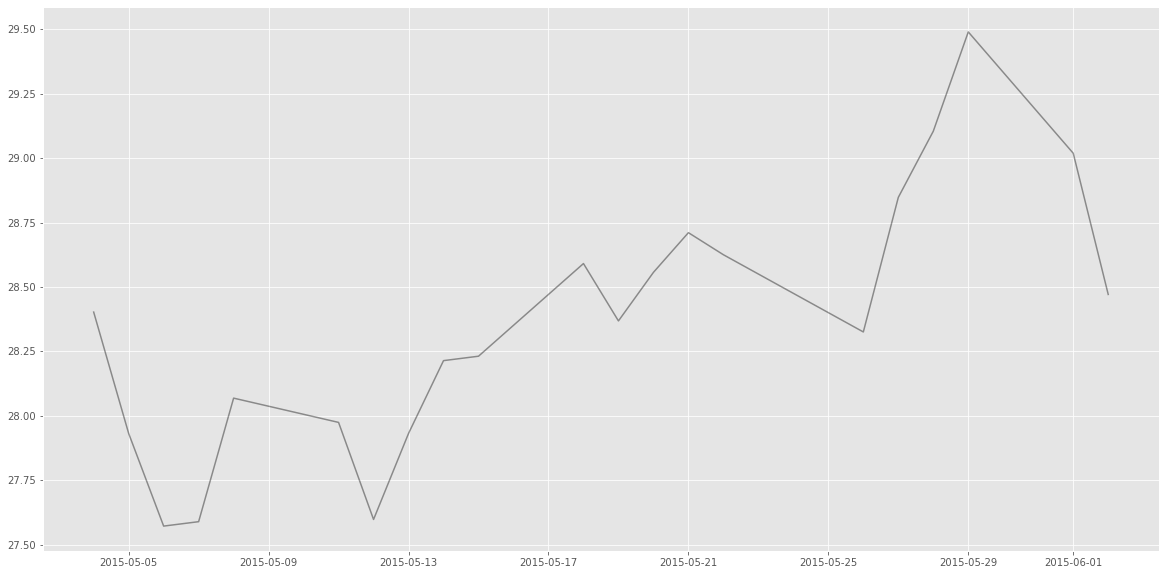

In [62]:
plt.plot(df['Close'] , alpha = 0.4 , color = 'black')    # Visualising stock movement during the desired period using matplotlib


In [63]:
# Simple Exponential Moving Average Strategy

short = 12     
long = 26

# This line defines the Short term and long term EMA. The span can altered by the user. I am using 12 Days and 26 Days EMA here

Short_Term_EMA = df["Close"].ewm(span=short).mean()       
Long_Term_EMA = df["Close"].ewm(span=short).mean()


df["STEMA"] = df["Close"].ewm(span=short).mean()     # These 2 lines add  columns 'STEMA' and 'LTEMA' to the dataframe
df["LTEMA"] = df["Close"].ewm(span=long).mean()      # STEMA and LTEMA stands for Short term and Long Term EMA respectively. 


df["Last Closing Price"] = df["Close"].shift(1)         # This Line adds previous day closing price to the dataframe
df["Change"] = df["Close"]/df["Last Closing Price"] 
df["% Change"] = (df["Close"] - df["Last Closing Price"])/ df["Last Closing Price"]*100   # Defining %-age Change

df["Investment"] = [1 if df.loc[i, "STEMA"] > df.loc[i, "LTEMA"]  # This line codes for an investment iff STEMA > LTEMA. 
                        else 0 for i in df.index]                 # If STEMA > LTEMA Investment = 1 otherwise = 0

df

,Open,Close,Volume,STEMA,LTEMA,Last Closing Price,Change,% Change,Investment
Date,,,,,,,,,
2015-05-04,28.266583,28.402521,21397300,28.402521,28.402521,NaN,NaN,NaN,0
2015-05-05,28.239923,27.931850,29779200,28.147575,28.158134,28.402521,0.983429,-1.657144,0
2015-05-06,27.812044,27.572433,31985400,27.923097,27.947698,27.931850,0.987132,-1.286764,0
2015-05-07,27.615224,27.589552,21475300,27.817810,27.847576,27.572433,1.000621,0.062085,0
2015-05-08,27.820600,28.068769,26926500,27.885995,27.898872,27.589552,1.017370,1.736953,0
2015-05-11,27.966078,27.974634,18358600,27.907539,27.914046,28.068769,0.996646,-0.335374,0
2015-05-12,27.760701,27.598108,24530200,27.838490,27.857858,27.974634,0.986540,-1.345955,0
2015-05-13,27.615222,27.931850,20470800,27.857973,27.869780,27.598108,1.012093,1.209294,0
2015-05-14,28.120113,28.214247,21098900,27.928457,27.920838,27.931850,1.010110,1.011019,1


In [64]:

ema = df[df["Investment"] == 1]   #This line defines a new dataframe 'ema' which only consists of those points where we invest.
ema["Return"] = np.cumprod(ema["Change"])  # Using cumprod function we add our profit to previously earned profit.(Compounding)


ema["Absolute_Return"] = ema["Return"] - 1
ema["% Return"] = ema["Absolute_Return"]*100
ema = ema.drop(labels = ['Absolute_Return'], axis = 1)
ema

<ipython-input-64-94f01cdbd91d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ema["Return"] = np.cumprod(ema["Change"])  # Using cumprod function we add our profit to previously earned profit.(Compounding)
<ipython-input-64-94f01cdbd91d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ema["Absolute_Return"] = ema["Return"] - 1
<ipython-input-64-94f01cdbd91d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Open,Close,Volume,STEMA,LTEMA,Last Closing Price,Change,% Change,Investment,Return,% Return
Date,,,,,,,,,,,
2015-05-14,28.120113,28.214247,21098900,27.928457,27.920838,27.931850,1.010110,1.011019,1,1.010110,1.011019
2015-05-15,28.316938,28.231363,17149700,27.985857,27.963687,28.214247,1.000607,0.060666,1,1.010723,1.072299
2015-05-18,28.222809,28.590784,23689500,28.096544,28.045022,28.231363,1.012731,1.273126,1,1.023591,2.359076
2015-05-19,28.547998,28.368290,21867100,28.144860,28.084740,28.590784,0.992218,-0.778202,1,1.015625,1.562516
2015-05-20,28.291265,28.556547,21359800,28.216344,28.140013,28.368290,1.006636,0.663618,1,1.022365,2.236503
2015-05-21,28.419628,28.710585,21269800,28.300498,28.204095,28.556547,1.005394,0.539412,1,1.027880,2.787979
2015-05-22,28.642125,28.625010,20845000,28.354859,28.249627,28.710585,0.997019,-0.298061,1,1.024816,2.481608
2015-05-26,28.470981,28.325500,28594500,28.350007,28.257564,28.625010,0.989537,-1.046319,1,1.014093,1.409323
2015-05-27,28.411078,28.847511,30172700,28.431296,28.317449,28.325500,1.018429,1.842901,1,1.032782,3.278196


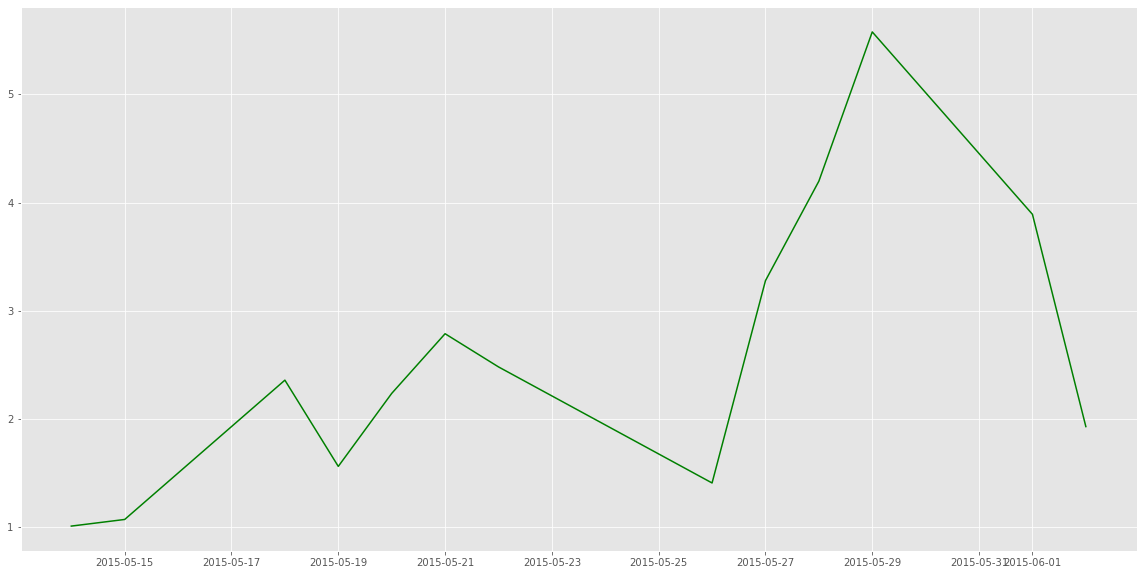

In [65]:
plt.plot(ema["% Return"], color = 'green') # Plotting % return using matplotlib




In [66]:

print("% Return in SEMA Stratregy :" + str(ema['% Return'][-1]))   # Prints Backtest results. 



% Return in SEMA Stratregy :1.9301321589633602
